Part 1: Install Required Dependencies

In [1]:
import tensorflow as tf
import os

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')

for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

Remove non-image files

In [3]:
import cv2
import imghdr

C:\Users\SAI\AppData\Local\Temp\ipykernel_2396\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [4]:
data_dir = "data"

In [5]:
image_exts = ["jpeg", "jpg", "bmp", "png"]

In [6]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)

            if tip not in image_exts:
                print("Removing non-image file: {}".format(image_path))
                os.remove(image_path)

        except Exception as e:
            print("Issue with image {}: {}".format(image_path, str(e)))

Load Data

In [7]:
import numpy as np
from matplotlib import pyplot as plt

In [8]:
data = tf.keras.utils.image_dataset_from_directory("data")

Found 1194 files belonging to 2 classes.


In [9]:
data_iterator = iter(data)


In [10]:
batch = next(data_iterator)

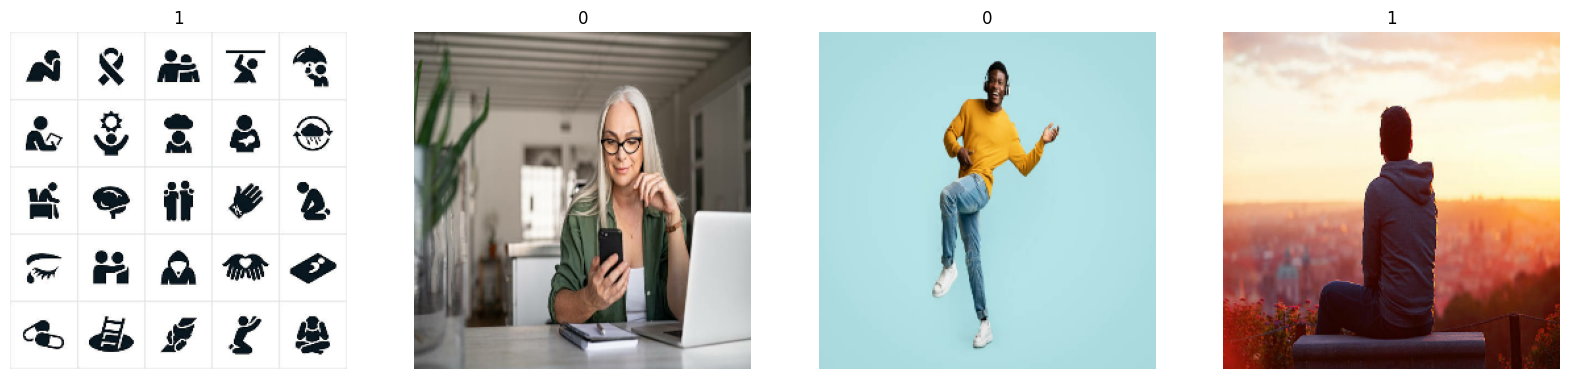

In [11]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(tf.squeeze(img).numpy().astype(np.uint8))
    ax[idx].set_title(batch[1][idx].numpy())
    ax[idx].axis("off")

plt.show()


Part 2: Preprocessing data

Scaling data

In [12]:
scaled_Data = data.map(lambda x, y: (x/255, y))
scaled_iterator = scaled_Data.as_numpy_iterator()
scaled_batch = scaled_iterator.next()

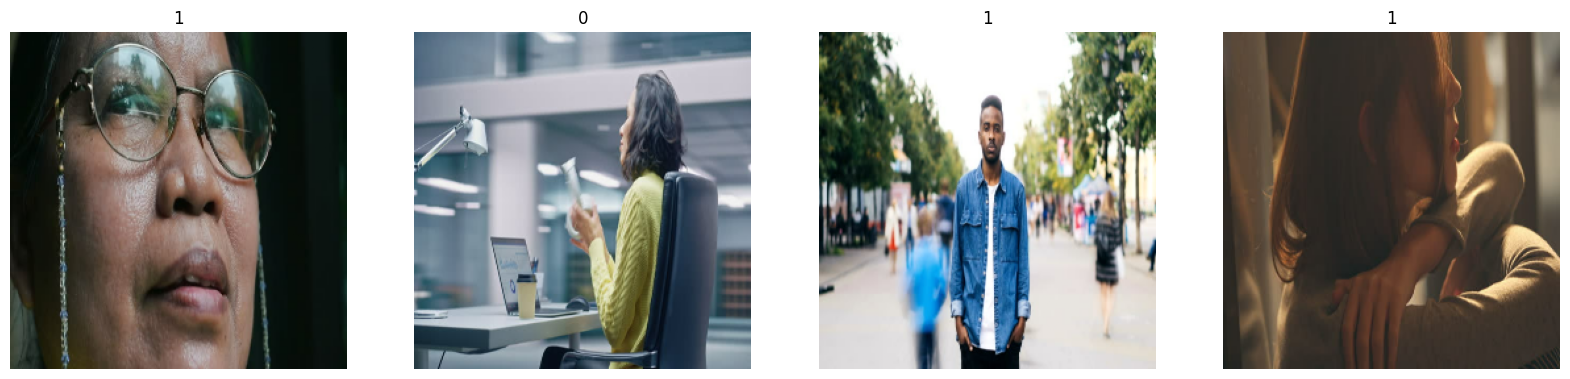

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(scaled_batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].set_title(scaled_batch[1][idx])
    ax[idx].axis("off")

plt.show()

Split data

In [14]:
train_size = int(len(scaled_Data)*.7)
val_size = int(len(scaled_Data)*.2)+1
test_size = int(len(scaled_Data)*.1)

In [15]:
train = scaled_Data.take(train_size)
val = scaled_Data.skip(train_size).take(val_size)
test = scaled_Data.skip(train_size+val_size).take(test_size)

Part 3: Deep modelling

Build deep learing model

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [17]:
model = Sequential()

In [18]:
model.add(Conv2D(16, (3,3), 1, activation="relu", input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dense(1, activation="sigmoid"))


In [19]:
# Build the model
model.build(input_shape=(None, 256, 256, 3))

In [20]:
model.compile("adam", loss=tf.losses.BinaryCrossentropy(), metrics=["accuracy"])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

Train

In [22]:
logdir = "logs"

In [23]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [24]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


26/26 [==============================] - 43s 2s/step - loss: 0.8386 - accuracy: 0.5252 - val_loss: 0.6853 - val_accuracy: 0.5508
Epoch 2/20
26/26 [==============================] - 40s 1s/step - loss: 0.6851 - accuracy: 0.5649 - val_loss: 0.7918 - val_accuracy: 0.5000
Epoch 3/20
26/26 [==============================] - 40s 1s/step - loss: 0.6534 - accuracy: 0.6082 - val_loss: 0.6626 - val_accuracy: 0.5859
Epoch 4/20
26/26 [==============================] - 40s 1s/step - loss: 0.6277 - accuracy: 0.6214 - val_loss: 0.6507 - val_accuracy: 0.6289
Epoch 5/20
26/26 [==============================] - 40s 1s/step - loss: 0.6184 - accuracy: 0.6779 - val_loss: 0.5981 - val_accuracy: 0.6523
Epoch 6/20
26/26 [==============================] - 40s 2s/step - loss: 0.5674 - accuracy: 0.7272 - val_loss: 0.5079 - val_accuracy: 0.7695
Epoch 7/20
26/26 [==============================] - 40s 2s/step - loss: 0.4620 - accuracy: 0.8029 - val_loss: 0.5299 - val_accuracy: 0.7383
Epoch 8/20
26/26 [=============

Plot Performance

In [25]:
hist.history

{'loss': [0.8386220932006836,
  0.6850941777229309,
  0.653406023979187,
  0.6276546120643616,
  0.6183995008468628,
  0.5674130320549011,
  0.46199071407318115,
  0.3698607087135315,
  0.26521238684654236,
  0.16769860684871674,
  0.11317792534828186,
  0.08379712700843811,
  0.04354151338338852,
  0.04459144175052643,
  0.03899994120001793,
  0.029493439942598343,
  0.016210222616791725,
  0.005147874355316162,
  0.0027590664103627205,
  0.0026839906349778175],
 'accuracy': [0.5252403616905212,
  0.5649038553237915,
  0.6081730723381042,
  0.6213942170143127,
  0.6778846383094788,
  0.7271634340286255,
  0.8028846383094788,
  0.8317307829856873,
  0.895432710647583,
  0.9399038553237915,
  0.9543269276618958,
  0.9771634340286255,
  0.9867788553237915,
  0.9903846383094788,
  0.9903846383094788,
  0.9903846383094788,
  0.9963942170143127,
  0.9975961446762085,
  1.0,
  0.9987980723381042],
 'val_loss': [0.6853176951408386,
  0.7917898893356323,
  0.6625657677650452,
  0.6506852507591

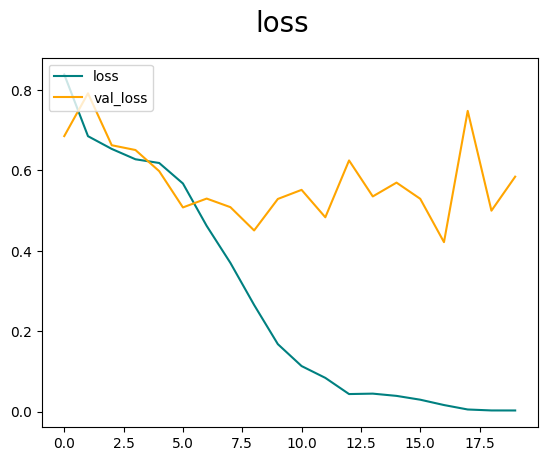

In [26]:
fig = plt.figure()
plt.plot(hist.history["loss"], color="teal", label="loss")
plt.plot(hist.history["val_loss"], color="orange", label="val_loss")
fig.suptitle("loss", fontsize=20)
plt.legend(loc="upper left")
plt.show()

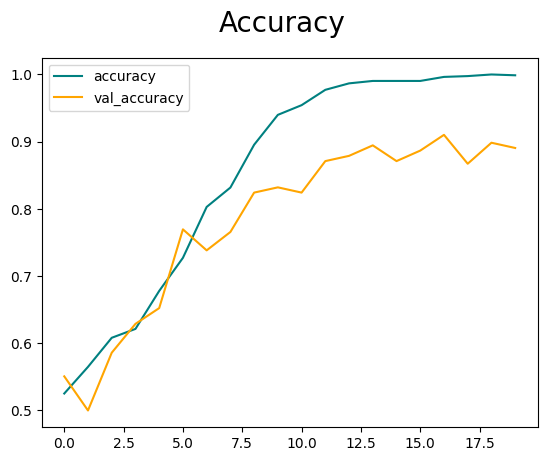

In [27]:
fig = plt.figure()
plt.plot(hist.history["accuracy"], color="teal", label="accuracy")
plt.plot(hist.history["val_accuracy"], color="orange", label="val_accuracy")
fig.suptitle("Accuracy", fontsize=20)
plt.legend(loc="upper left")
plt.show()

Part 4: Evaluvating Performance

Evavulate

In [28]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [29]:
len(test)

3

In [30]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [31]:
for temp_batch in test.as_numpy_iterator():
    x, y = temp_batch
    yhat = model.predict(x)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 302ms/step


In [32]:
print(f"Precision: {pre.result().numpy()}   Recall: {re.result().numpy()}   Accuracy: {acc.result().numpy()}")

Precision: 0.8695651888847351   Recall: 0.800000011920929   Accuracy: 0.8333333134651184


Test

In [33]:
import cv2

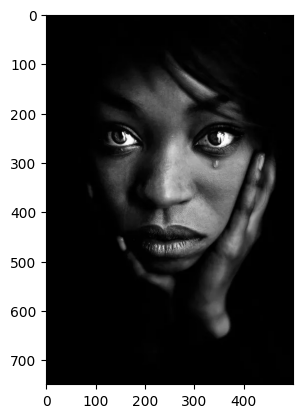

In [49]:
img = cv2.imread("sadtest3.jpg")
plt.imshow(img)
plt.show()

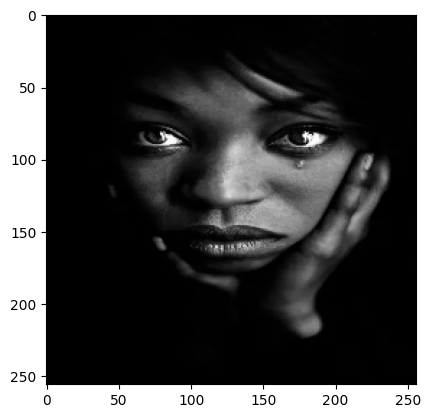

In [50]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [51]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 50ms/step


In [52]:
yhat

array([[0.99999946]], dtype=float32)

In [53]:
if yhat < 0.5:
    print("The person shown in the image is happy!")
else:
    print("The person shown in the image is sad!")

The person shown in the image is sad!


Part 5:Save the model

Save the model

In [55]:
from tensorflow.keras.models import load_model

In [56]:
model.save(os.path.join("models", "happy_sad_model.h5"))

c:\Python 311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [57]:
new_model = load_model(os.path.join("models", "happy_sad_model.h5"))

In [63]:
new_yhat = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 54ms/step


In [64]:
if new_yhat < 0.5:
    print("The person shown in the image is happy!")
else:
    print("The person shown in the image is sad!")

The person shown in the image is sad!
